In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Columns 
# 1: id (int) [0-...]
# 2: year (number)
# 3: month (number)
# 4: day_of_month (number)
# 5: prp (float) [mm]
# 6: tmax (float) [°C]
# 7: tmin (float) [°C]
# negative values (-99.9) are missing data


# Carga de datos
df = pd.read_csv(os.path.join('..', 'data','data_precipitaciones', 'SANMARTIN_NARANJILLO.csv'))


In [2]:
# Adding column names
df.columns = ['id', 'year', 'month', 'day_of_month', 'prp', 'tmax', 'tmin']
# replacing negative values with NaN
df[df<0] = np.nan
# sampling 20 rows
df.sample(20)


,id,year,month,day_of_month,prp,tmin,tmax
12914,12915,2010,8,10,0.0,29.4,15.5
3037,3038,1983,7,26,0.0,NaN,NaN
9074,9075,2000,2,4,0.0,29.8,17.0
13063,13064,2011,1,6,0.0,30.4,18.4
6076,6077,1991,11,20,0.0,NaN,NaN
12858,12859,2010,6,15,0.0,30.0,19.8
3258,3259,1984,3,3,0.0,NaN,NaN
10785,10786,2004,10,11,1.0,27.6,19.0
1592,1593,1979,8,11,0.0,NaN,NaN
872,873,1977,8,21,1.3,NaN,NaN


In [3]:
# Number of rows 
print('Number of rows: ', df.shape[0])
# Proportion of Nan by column
print('Proportion of Nan by column: ', df.isna().sum()/df.shape[0])

Number of rows:  14335
Proportion of Nan by column:  id              0.000000
year            0.000000
month           0.000000
day_of_month    0.000000
prp             0.009627
tmin            0.566097
tmax            0.566167
dtype: float64


# Precipitation Data
We suspect that precipitation data for the rainforest region 
doesn't contain enought information to build an useful model.


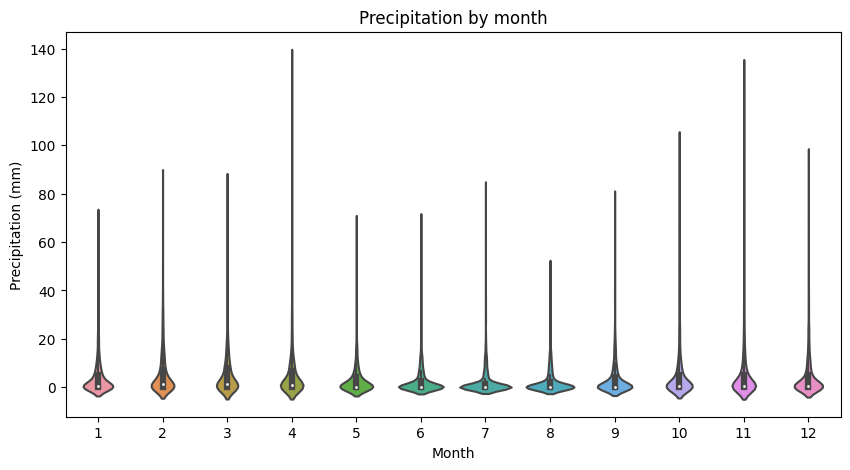

In [4]:
# Group prp data by month 
prp_month = df.groupby('month')['prp']

# Plotting violin plot
plt.figure(figsize=(10,5))
sns.violinplot(x='month', y='prp', data=df)
plt.title('Precipitation by month')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()

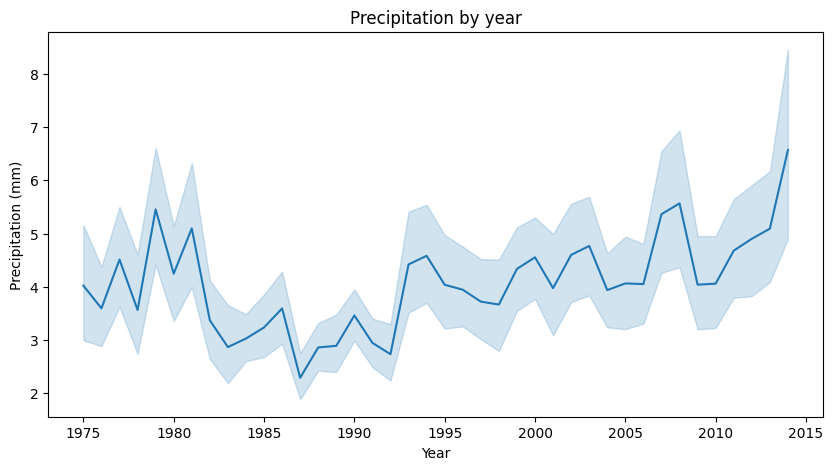

In [5]:
# Plot precipitation by year
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='prp', data=df)
plt.title('Precipitation by year')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.show()

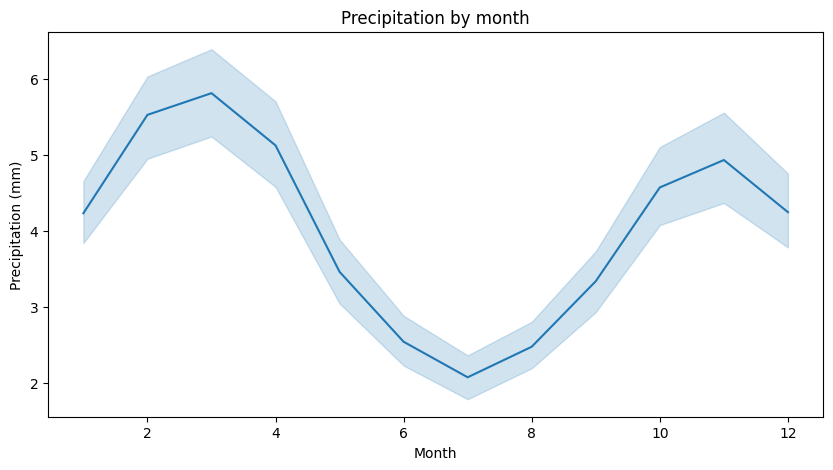

In [6]:
# Lineplot of prp by month of all the data
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='prp', data=df)
plt.title('Precipitation by month')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()

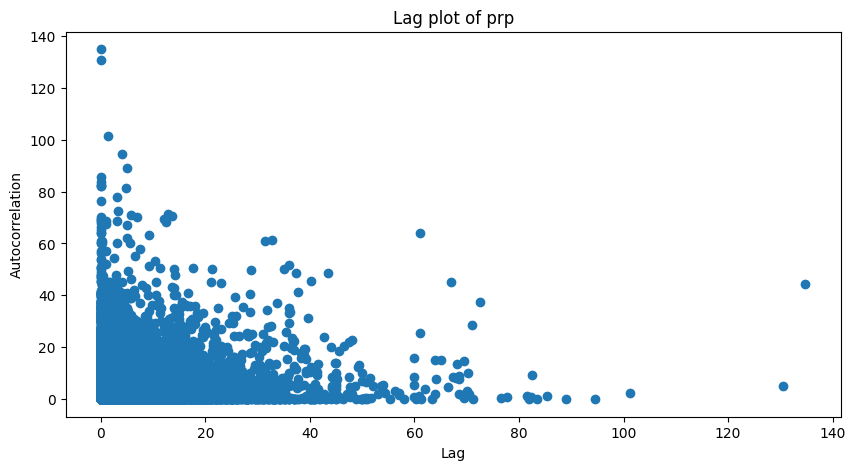

In [15]:
# lag plot of prp with pandas
from pandas.plotting import lag_plot
plt.figure(figsize=(10,5))
lag_plot(df['prp'])
plt.title('Lag plot of prp')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

c:\Users\4verBurga\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


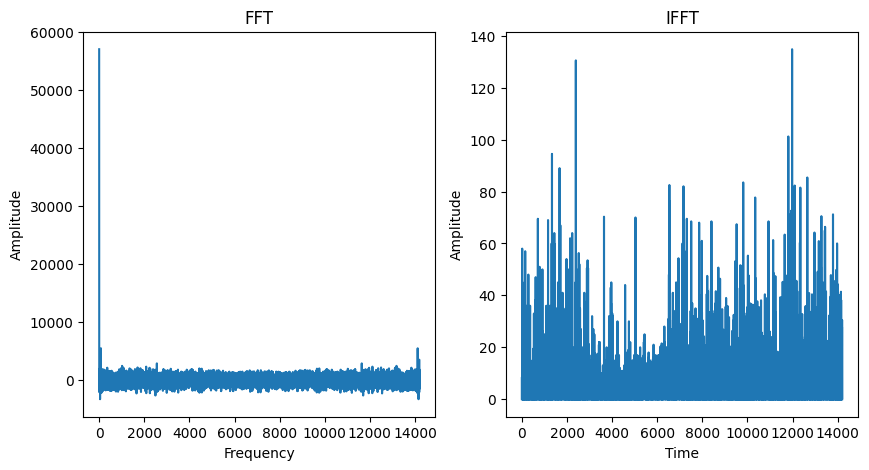

In [26]:
# fft 
from scipy.fftpack import fft, ifft
# removing NaN
prp = df['prp'].dropna()
# fft
prp_fft = fft(prp.values)
# inverse fft
prp_ifft = ifft(prp_fft)
# plotting both subplots, fft and ifft
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(prp_fft)
plt.title('FFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.subplot(1,2,2)
plt.plot(prp_ifft)
plt.title('IFFT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()





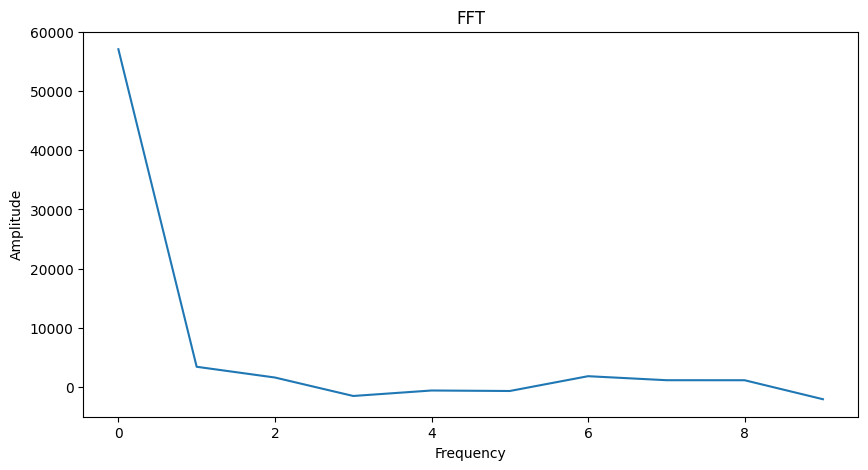

In [29]:
# show only x axis of fft from months
plt.figure(figsize=(10,5))
plt.plot(prp_fft[:12])
plt.title('FFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()
